In this notebook we calculate the parallel diameter $d_{||}$ and the fractional asymmetry $f_A$ of the black hole shadow for $38\times38=1444$ spin-inclination pairs $(a, i)$. This data is then used to produce a contour plot. It takes ~12 hours to run.

In [2]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



In [2]:
import params

In [3]:
dpara=[]
asym=[]

In [4]:
spins=np.linspace(0.01, 0.99, 38)
angles=np.linspace(1, 89, 38)
for a in spins:
    d_a=[]
    f_A=[]
    for i in angles:
        with open("params.py","r+") as f:
            new_f = f.readlines()
            f.seek(0)
            for line in new_f:
        #         if "spin_case" not in line:
        #             f.write(line)
                if "spin_case=" in line:
                    f.write("spin_case=" +str(a)+ "\n")
                elif "i_case=" in line:
                    f.write("i_case=" + str(i)+"\n")
                else:
                    f.write(line)
            f.truncate()
        importlib.reload(params)
        from params import *
        %time !python3 lensingbands.py
        fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)
        h5f = h5py.File(fnbands,'r')
        
        #Points for the boundary of the BH shadow
        alpha_critc=h5f['alpha'][:]
        beta_critc=h5f['beta'][:]
        d_perp_shadow = min(alpha_critc[-1]-alpha_critc[0], 2*beta_critc.max())
        d_para_shadow = max(alpha_critc[-1]-alpha_critc[0], 2*beta_critc.max())
        f_a = (1-d_perp_shadow/d_para_shadow)*100
        d_a.append(d_para_shadow)
        f_A.append(f_a)
    dpara.append(d_a)
    asym.append(f_A)


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  4000000
Number of points in the n=1 grid  78400
Number of points in the n=2 grid  57600
File  ./Results/LensingBands_a_0.01_i_1.0.h5  created.
CPU times: user 450 ms, sys: 133 ms, total: 583 ms
Wall time: 34.5 s

Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  4000000
Number of points in the n=1 grid  78400
Number of points in the n=2 grid  57600
File  ./Results/LensingBands_a_0.01_i_3.3783783783783785.h5  created.
CPU times: user 419 ms, sys: 130 ms, total: 548 ms
Wall time: 33.8 s

Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca


T

In [6]:
from scipy.ndimage import zoom
# plt.rcParams.update({
#     "font.size" : 14,                   # Set font size to 11pt
#     "axes.labelsize": 14,               # -> axis labels
#     "legend.fontsize": 12,              # -> legends
#     "text.usetex": True,
#     "text.latex.preamble": (r'\usepackage{lmodern}'), # LaTeX preamble
#     "font.family": 'Latin Modern Roman',
# })
plt.rcParams.update(plt.rcParamsDefault)

In [7]:
A, I = np.meshgrid(spins, angles)
pw=3
Asm = zoom(A, pw, order=2)
Ism = zoom(I, pw, order=2)
Dsm = zoom(dpara, pw, order=2)
Fsm = zoom(asym, pw, order=2)

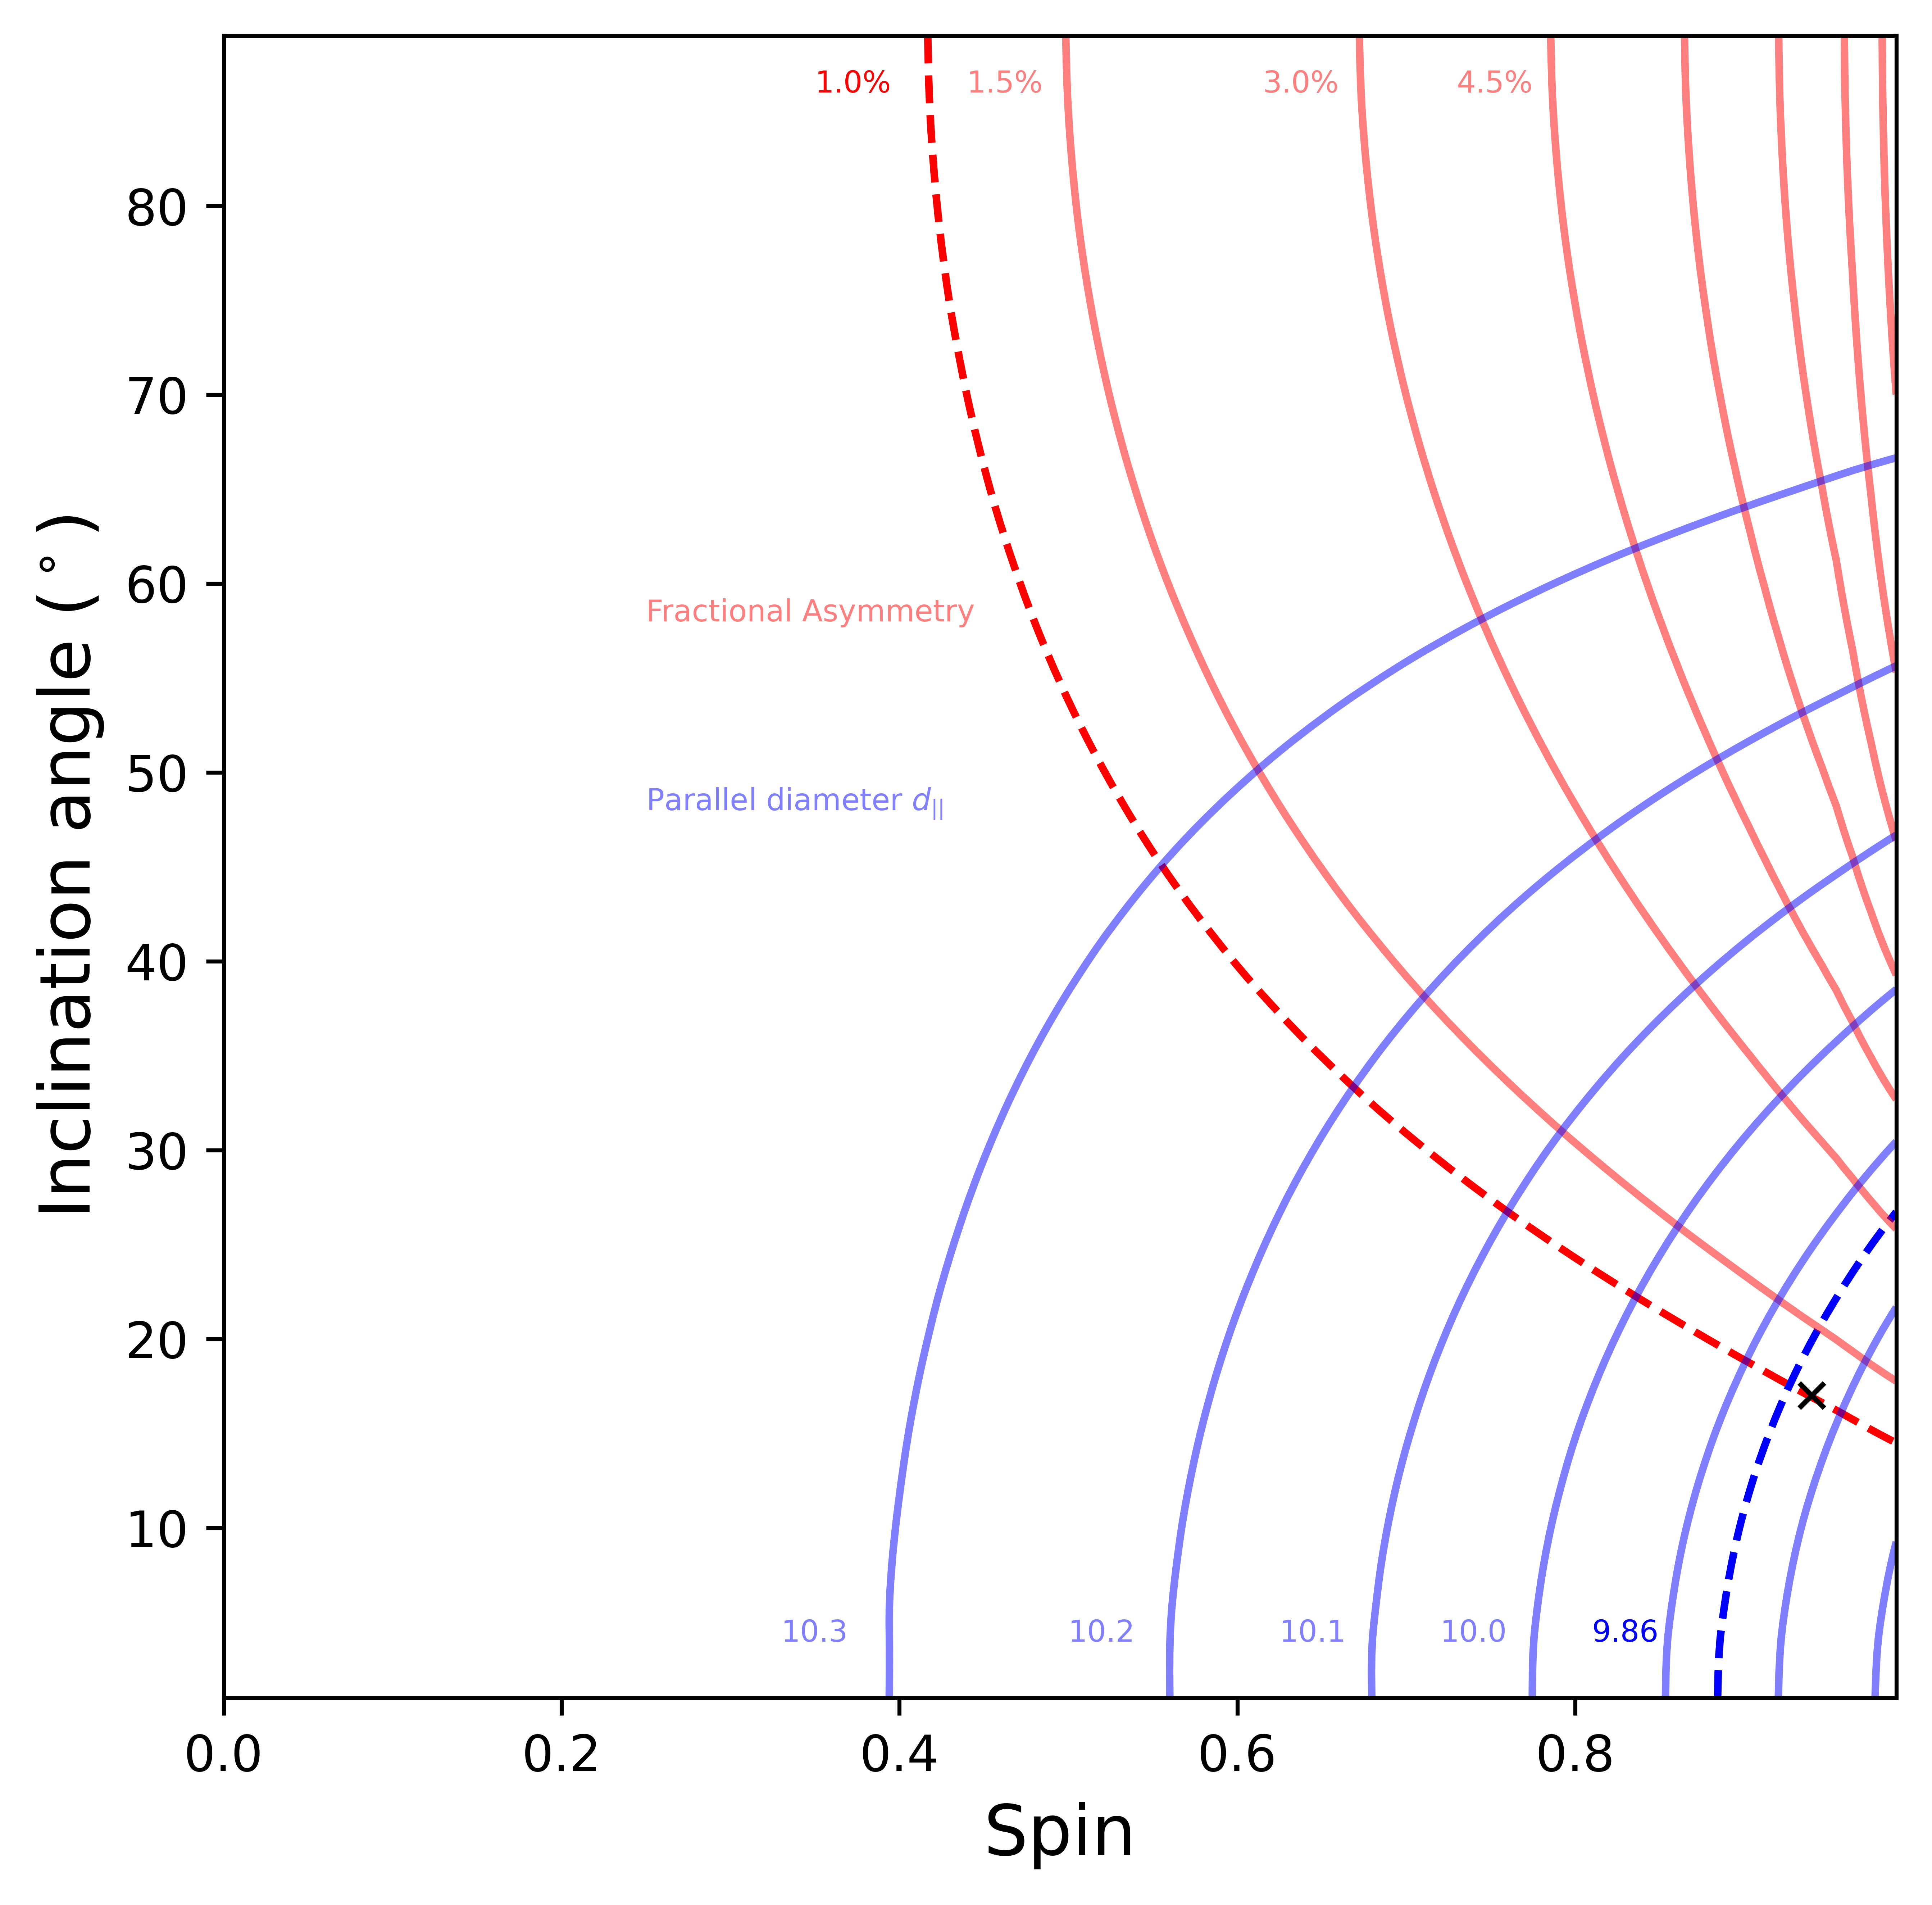

In [77]:
fig, ax = plt.subplots(figsize=(6,6),dpi=1000)
CS1 = ax.contour(Asm, Ism, np.transpose(Fsm), colors='r',levels=[1.0144189711506879],linestyles="dashed")
# positions1 = [(0.40,83), (0.62,83), (0.81,83)]
# labels1 = ax.clabel(CS1, inline=True, fontsize=6, fmt='%.1f %%', manual=positions1)
CS2 = ax.contour(Asm, Ism, np.transpose(Dsm), colors='b',levels=[9.85566243626449],linestyles="dashed")
# positions2 = [(0.40,6), (0.62, 6), (0.7, 6), (0.81,6), (0.85, 6), (0.9, 6)]
# labels2 = ax.clabel(CS2, inline=True, fontsize=6, manual=positions2)
CS3 = ax.contour(Asm, Ism, np.transpose(Fsm), colors='r',alpha=0.5)
CS4 = ax.contour(Asm, Ism, np.transpose(Dsm), colors='b',alpha=0.5)
ax.set_xlabel('Spin', size=14)
ax.set_ylabel('Inclination angle ($^\circ$)', size=14)
# for l in labels1+labels2:
#     l.set_rotation(0)
ax.plot(0.94,17,"x",markersize=5,color="k")
plt.annotate('Fractional Asymmetry',(0.25,58), color='r', fontsize=6, alpha=0.5)
plt.annotate('1.5%',(0.44,86), color='r', fontsize=6, alpha=0.5)
plt.annotate('3.0%',(0.615,86), color='r', fontsize=6, alpha=0.5)
plt.annotate('4.5%',(0.73,86), color='r', fontsize=6, alpha=0.5)
plt.annotate('Parallel diameter $d_{||}$',(0.25,48), color='b', fontsize=6, alpha=0.5)
plt.annotate('10.3',(0.33,4), color='b', fontsize=6, alpha=0.5)
plt.annotate('10.2',(0.5,4), color='b', fontsize=6, alpha=0.5)
plt.annotate('10.1',(0.625,4), color='b', fontsize=6, alpha=0.5)
plt.annotate('10.0',(0.72,4), color='b', fontsize=6, alpha=0.5)
plt.annotate('1.0%', (0.35, 86), color='r', fontsize=6)
plt.annotate('9.86', (0.81, 4), color='b', fontsize=6)
plt.xticks(np.arange(0, 1.0, 0.2))
plt.savefig('contour_plot.pdf',dpi=1000,bbox_inches='tight')
plt.show()


In [40]:
# Saving the array in a text file
np.savetxt("dpara_BH_shadow.txt", dpara)
 
# Displaying the contents of the text file
content = np.loadtxt('dpara_BH_shadow.txt')
print("\nContent in dpara_BH_shadow.txt:\n", content)


Content in dpara_BH_shadow.txt:
 [[10.39218837 10.39222738 10.39223793 ... 10.39224598 10.39224632
  10.39224608]
 [10.39148419 10.39150938 10.39151718 ... 10.39153508 10.39153538
  10.3915355 ]
 [10.38995006 10.38999886 10.39000119 ... 10.39098304 10.3909897
  10.39099893]
 ...
 [ 9.77225871  9.77405631  9.77914605 ... 10.386602   10.38993684
  10.39148956]
 [ 9.72600632  9.72799876  9.73374703 ... 10.3856349  10.3891354
  10.39086701]
 [ 9.67634455  9.67871614  9.68507518 ... 10.38604883 10.38980746
  10.39157582]]


In [41]:
# Saving the array in a text file
np.savetxt("asym_BH_shadow.txt", asym)
 
# Displaying the contents of the text file
content_2 = np.loadtxt('asym_BH_shadow.txt')
print("\nContent in asym_BH_shadow.txt:\n", content_2)


Content in asym_BH_shadow.txt:
 [[9.22336352e-03 1.10196204e-02 1.20231705e-02 ... 1.17581213e-02
  1.19413924e-02 1.19591014e-02]
 [8.95722837e-03 1.19326204e-02 1.21532548e-02 ... 5.03567049e-03
  5.13488202e-03 4.85300148e-03]
 [1.02432943e-02 1.21330290e-02 1.20225472e-02 ... 9.35302182e-03
  9.42238804e-03 9.50745480e-03]
 ...
 [6.61901874e-03 3.13309658e-02 1.10855452e-01 ... 8.02624518e+00
  8.05591460e+00 8.06967023e+00]
 [5.35368984e-03 3.70939205e-02 1.30592963e-01 ... 9.18204829e+00
  9.21284341e+00 9.22800981e+00]
 [5.90327590e-03 4.54592388e-02 1.55092770e-01 ... 1.10818784e+01
  1.11143147e+01 1.11294845e+01]]
